In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

In [2]:

preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
print(preDouble)

\\iobsdc01\SharedDocs\SEER_MEDICARE\SEER_MEDICARE_STAGING


In [3]:
import pedsfhelp

In [4]:
df1 = pedsfhelp.make_clean_dataframe('pedsf.nasopharynx.cancer.txt')
print(df1.shape)

(1645, 496)


For all non-custom requests, patients have been selected if the cancer(s) requested appeared in the site array (sitewho1-10) and the associated year of diagnosis (yrdx1-10) fell in the year of diagnosis window requested.

In [7]:
df1.siterwho1.value_counts()

Nasopharynx                          1445
Prostate                               51
Breast                                 22
Lung and Bronchus                      15
Melanoma of the Skin                   14
NHL - Nodal                             7
Urinary Bladder                         6
Tonsil                                  6
Gum and Other Mouth                     5
Sigmoid Colon                           5
Kidney and Renal Pelvis                 5
Larynx                                  4
Nose, Nasal Cavity and Middle Ear       4
Oropharynx                              3
Rectum                                  3
Liver                                   3
Rectosigmoid Junction                   3
Chronic Lymphocytic Leukemia            3
Corpus Uteri                            3
Floor of Mouth                          3
Miscellaneous                           3
Tongue                                  3
Hypopharynx                             2
NHL - Extranodal                  

In [8]:
df1 = df1[df1.siterwho1.str.contains('nasopharynx',case=False,na=False)]
df1.siterwho1.value_counts()

Nasopharynx    1445
Name: siterwho1, dtype: int64

In [9]:
df2 = pedsfhelp.make_clean_dataframe('pedsf.salivarygland.cancer.txt')
print(df2.shape)

(4098, 496)


In [10]:
df2.siterwho1.value_counts()

Salivary Gland                         3242
Prostate                                190
Breast                                  131
Melanoma of the Skin                     96
Urinary Bladder                          39
Lung and Bronchus                        33
NHL - Nodal                              31
Chronic Lymphocytic Leukemia             28
Thyroid                                  26
Kidney and Renal Pelvis                  26
Corpus Uteri                             17
Other Non-Epithelial Skin                16
Miscellaneous                            16
Lip                                      16
Sigmoid Colon                            16
Rectum                                   14
Gum and Other Mouth                      14
Larynx                                   14
NHL - Extranodal                         13
Ascending Colon                           8
Cecum                                     8
Tongue                                    8
Eye and Orbit                   

In [11]:
df2 = df2[df2.siterwho1.str.contains('salivary',case=False,na=False)]
df2.siterwho1.value_counts()

Salivary Gland    3242
Name: siterwho1, dtype: int64

In [12]:
df3 = pedsfhelp.make_clean_dataframe('pedsf.oropharynx.cancer.txt')
print(df3.shape)

(1373, 496)


In [13]:
df3.siterwho1.value_counts()

Oropharynx                             1080
Prostate                                 44
Lung and Bronchus                        25
Gum and Other Mouth                      25
Larynx                                   23
Breast                                   23
Hypopharynx                              14
Urinary Bladder                          14
Tongue                                   12
Tonsil                                   12
Floor of Mouth                           11
Melanoma of the Skin                      9
Esophagus                                 7
Miscellaneous                             6
NHL - Nodal                               6
Other Oral Cavity and Pharynx             6
Rectum                                    5
Corpus Uteri                              4
Nasopharynx                               4
Transverse Colon                          3
Thyroid                                   3
Ascending Colon                           3
Ovary                           

In [14]:
df3 = df3[df3.siterwho1.str.contains('oropharynx',case=False,na=False)]
df3.siterwho1.value_counts()

Oropharynx    1080
Name: siterwho1, dtype: int64

In [15]:
df4 = pedsfhelp.make_clean_dataframe('pedsf.esophagus.cancer.txt')
print(df4.shape)

(16572, 496)


In [16]:
df4.siterwho1.value_counts()

Esophagus                              13497
Prostate                                 868
Breast                                   267
Lung and Bronchus                        262
Urinary Bladder                          191
Melanoma of the Skin                     162
Larynx                                   122
Sigmoid Colon                             77
Kidney and Renal Pelvis                   74
Stomach                                   70
Tongue                                    69
NHL - Nodal                               68
Rectum                                    67
Miscellaneous                             53
Cecum                                     52
Corpus Uteri                              40
NHL - Extranodal                          40
Hypopharynx                               38
Gum and Other Mouth                       35
Tonsil                                    34
Cervix Uteri                              31
Ascending Colon                           31
Floor of M

In [17]:
df4 = df4[df4.siterwho1.str.contains('esophagus',case=False,na=False)]
df4.siterwho1.value_counts()

Esophagus    13497
Name: siterwho1, dtype: int64

In [18]:
df5 = pedsfhelp.make_clean_dataframe('pedsf.brain.cancer.txt')
print(df5.shape)

(48050, 496)


In [19]:
df5.siterwho1.value_counts()

Cranial Nerves Other Nervous System                  23536
Brain                                                15180
Breast                                                1959
Prostate                                              1544
Lung and Bronchus                                     1006
Melanoma of the Skin                                   623
Urinary Bladder                                        371
Kidney and Renal Pelvis                                370
Corpus Uteri                                           294
NHL - Nodal                                            243
Thyroid                                                235
Miscellaneous                                          211
Sigmoid Colon                                          184
Cervix Uteri                                           161
Cecum                                                  159
Rectum                                                 139
NHL - Extranodal                                       1

In [21]:
df5 = df5[df5.siterwho1.str.contains('cranial',case=False,na=False) | \
         df5.siterwho1.str.contains('brain',case=False,na=False)]
df5.siterwho1.value_counts()

Cranial Nerves Other Nervous System    23536
Brain                                  15180
Name: siterwho1, dtype: int64

In [22]:
df6 = pedsfhelp.make_clean_dataframe('pedsf.eyeandorbit.cancer.txt')
print(df6.shape)

(2773, 496)


In [23]:
df6.siterwho1.value_counts()

Eye and Orbit                        2326
Prostate                              115
Breast                                 71
Melanoma of the Skin                   69
Lung and Bronchus                      23
Urinary Bladder                        18
NHL - Nodal                            16
Chronic Lymphocytic Leukemia           11
Kidney and Renal Pelvis                11
Sigmoid Colon                           9
Corpus Uteri                            9
Larynx                                  8
Miscellaneous                           7
Cecum                                   6
Cervix Uteri                            6
NHL - Extranodal                        5
Other Non-Epithelial Skin               5
Gum and Other Mouth                     4
Tonsil                                  4
Rectum                                  4
Anus, Anal Canal and Anorectum          3
Thyroid                                 3
Transverse Colon                        3
Hepatic Flexure                   

In [24]:
df6 = df6[df6.siterwho1.str.contains('eye',case=False,na=False)]
df6.siterwho1.value_counts()

Eye and Orbit    2326
Name: siterwho1, dtype: int64

In [25]:
df7 = pedsfhelp.make_clean_dataframe('pedsf.softtissue.cancer.txt')
print(df7.shape)

(8741, 496)


In [26]:
df7.siterwho1.value_counts()

Soft Tissue including Heart            6968
Prostate                                435
Breast                                  305
Melanoma of the Skin                    171
Urinary Bladder                          97
Lung and Bronchus                        78
Corpus Uteri                             61
Rectum                                   37
Kidney and Renal Pelvis                  35
NHL - Nodal                              33
Miscellaneous                            33
Thyroid                                  31
Chronic Lymphocytic Leukemia             28
NHL - Extranodal                         23
Other Non-Epithelial Skin                23
Larynx                                   22
Cecum                                    22
Ovary                                    19
Cervix Uteri                             18
Sigmoid Colon                            18
Ascending Colon                          15
Myeloma                                  14
Tongue                          

In [27]:
df7 = df7[df7.siterwho1.str.contains('soft',case=False,na=False)]
df7.siterwho1.value_counts()

Soft Tissue including Heart    6968
Name: siterwho1, dtype: int64

In [28]:
df8 = pedsfhelp.make_clean_dataframe('pedsf.prostate.cancer.file01.txt')
print(df8.shape)

(119999, 496)


In [29]:
df8.siterwho1.value_counts()

Prostate                                             109339
Urinary Bladder                                        2388
Melanoma of the Skin                                   1741
Kidney and Renal Pelvis                                 729
Lung and Bronchus                                       601
Sigmoid Colon                                           535
NHL - Nodal                                             418
Rectum                                                  353
Cecum                                                   271
Ascending Colon                                         259
Chronic Lymphocytic Leukemia                            254
Larynx                                                  239
Miscellaneous                                           239
NHL - Extranodal                                        194
Thyroid                                                 187
Rectosigmoid Junction                                   172
Myeloma                                 

In [30]:
df8 = df8[df8.siterwho1.str.contains('prostate',case=False,na=False)]
df8.siterwho1.value_counts()

Prostate    109339
Name: siterwho1, dtype: int64

In [31]:
df9 = pedsfhelp.make_clean_dataframe('pedsf.prostate.cancer.file02.txt')
print(df9.shape)

(120000, 496)


In [32]:
df9.siterwho1.value_counts()

Prostate                                             110986
Urinary Bladder                                        2155
Melanoma of the Skin                                   1577
Kidney and Renal Pelvis                                 642
Lung and Bronchus                                       487
Sigmoid Colon                                           413
NHL - Nodal                                             307
Rectum                                                  277
Miscellaneous                                           217
Cecum                                                   215
Ascending Colon                                         197
Chronic Lymphocytic Leukemia                            188
Larynx                                                  181
NHL - Extranodal                                        180
Thyroid                                                 169
Stomach                                                 109
Myeloma                                 

In [33]:
df9 = df9[df9.siterwho1.str.contains('prostate',case=False,na=False)]
df9.siterwho1.value_counts()

Prostate    110986
Name: siterwho1, dtype: int64

In [34]:
df10 = pedsfhelp.make_clean_dataframe('pedsf.prostate.cancer.file03.txt')
print(df10.shape)

(28274, 496)


In [35]:
df10 = df10[df10.siterwho1.str.contains('prostate',case=False,na=False)]
df10.siterwho1.value_counts()

Prostate    26052
Name: siterwho1, dtype: int64

In [36]:
df11 = pedsfhelp.make_clean_dataframe('pedsf.lung.cancer.file01.txt')
print(df11.shape)

(119999, 496)


In [38]:
df11.siterwho1.value_counts()

Lung and Bronchus                                    98819
Prostate                                              4683
Breast                                                3686
Urinary Bladder                                       2134
Melanoma of the Skin                                  1018
Larynx                                                 837
Kidney and Renal Pelvis                                663
Sigmoid Colon                                          588
NHL - Nodal                                            570
Cervix Uteri                                           563
Rectum                                                 490
Corpus Uteri                                           473
Cecum                                                  391
Miscellaneous                                          389
Ascending Colon                                        331
Chronic Lymphocytic Leukemia                           270
Thyroid                                                2

In [39]:
df11 = df11[df11.siterwho1.str.contains('lung',case=False,na=False)]
df11.siterwho1.value_counts()

Lung and Bronchus    98819
Name: siterwho1, dtype: int64

In [40]:

df12 = pedsfhelp.make_clean_dataframe('pedsf.lung.cancer.file02.txt')
print(df12.shape)

(115358, 496)


In [41]:
df12 = df12[df12.siterwho1.str.contains('lung',case=False,na=False)]
df12.siterwho1.value_counts()

Lung and Bronchus    97514
Name: siterwho1, dtype: int64

In [42]:
df = pd.concat([df1,df2,df3,df4,df5,df6,
                df7,df8,df9,df10,df11,df12],ignore_index=True)

print(df.shape)

(509984, 496)


In [43]:
del df1
del df2
del df3
del df4
del df5
del df6
del df7
del df8
del df9
del df10
del df11
del df12

In [44]:
#store = HDFStore("pedsf.h5")
#store['dfpedsf'] = df
#store.close()

df.to_pickle('dfpedsfFirsts.pickle')

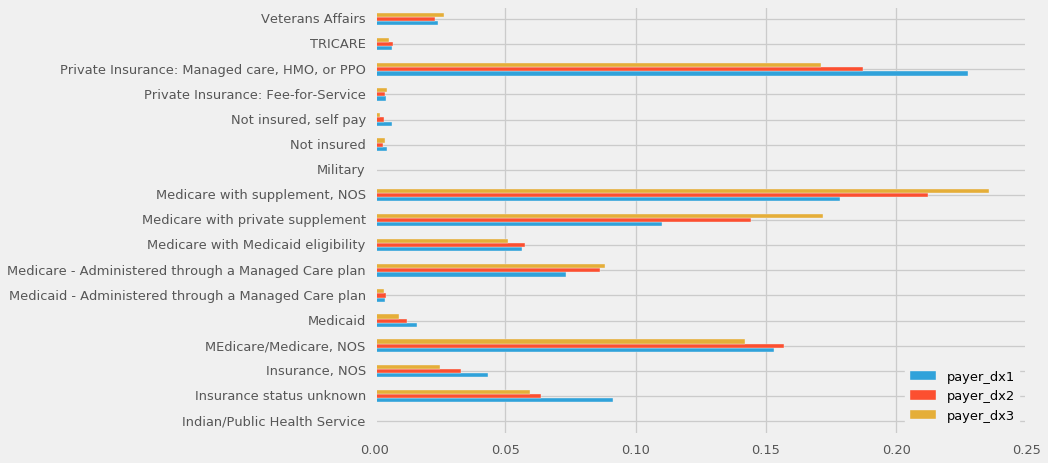

In [45]:
one = df.payer_dx1.dropna().value_counts(normalize=True).sort_index()
two = df.payer_dx2.dropna().value_counts(normalize=True).sort_index()

three = df.payer_dx3.dropna().value_counts(normalize=True).sort_index()

dfager = pd.DataFrame({'payer_dx1': one,
                      'payer_dx2': two,
                      'payer_dx3': three})

dfager.plot(kind='barh')


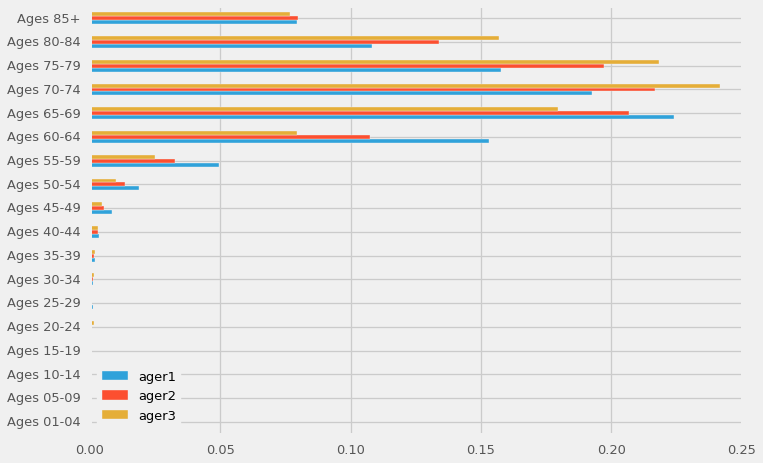

In [46]:
one = df.ager1.dropna().value_counts(normalize=True).sort_index()
two = df.ager2.dropna().value_counts(normalize=True).sort_index()

three = df.ager3.dropna().value_counts(normalize=True).sort_index()

dfager = pd.DataFrame({'ager1': one,
                      'ager2': two,
                      'ager3': three})

dfager.plot(kind='barh')

In [47]:
print(list(df.columns))


['casereg', 'patient_id', 'casenumber', 'fivepct', 'medicaredateofdeath', 'birthm', 'birthyr', 'm_sex', 'race', 'state', 'county', 'zip5', 'urbrur', 'urban', 's_sex', 'rac_recb', 'rac_recy', 'rac_reca', 'icd_code', 'cod89v', 'cod10v', 'codkm', 'codpub', 'nhiade', 'ser_dodm', 'ser_dody', 'deathflag', 'srace', 'origin', 'origrecb', 'stat_rec', 'census_pov_ind', 'yr_brth', 'count', 'numprims', 'resnrec', 'plc_brth_cnt', 'plc_brth_state', 'reg1', 'marst1', 'agedx1', 'seq1', 'modx1', 'yrdx1', 'site1', 'lat1', 'hist1', 'beh1', 'grade1', 'dxconf1', 'e10pn1', 'cstum1', 'dajcct1', 'dajccn1', 'dajccm1', 'dajccstg1', 'dss77s1', 'dss00s1', 'sxprif1', 'sxscof1', 'sxsitf1', 'nosrg1', 'rad1', 'radsurg1', 'ager1', 'siterwho1', 'icdot09_1', 'iccc3who1', 'histrec1', 'hisrcb1', 'statecd1', 'cnty1', 'cssch1', 'srvm1', 'insrecpb1', 'payer_dx1', 'reg2', 'marst2', 'agedx2', 'seq2', 'modx2', 'yrdx2', 'site2', 'lat2', 'hist2', 'beh2', 'grade2', 'dxconf2', 'e10pn2', 'cstum2', 'dajcct2', 'dajccn2', 'dajccm2', 'd

In [48]:
mask = (df['cstum1'] != "Unknown; size not stated; not stated in patient record") & \
(df['cstum1'] != "Microscopic focus or foci only; no size of focus is given") & \
(df['cstum1'] != "989 millimeters or larger") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != "Unknown age") & \
(df['cstum1'] != "Described as less than 1 cm") & \
(df['cstum1'] != "Described as less than 2 cm") & \
(df['cstum1'] != "Described as less than 3 cm") & \
(df['cstum1'] != 'Indicates no mass or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized') & \
(df['cstum1'] != "Described as less than 4 cm") & \
(df['cstum1'] != "Described as less than 5 cm") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != 'Not applicable') & \
(df['cstum1'] != 996) & \
(df['cstum1'] != 997) & \
(df['cstum1'] != 998) & \
(df['srvm1'] != 9999)
dfall = df[mask]

In [49]:
geomask = (dfall['elevation_1'] != dfall['FIPScombo_1']) 

dfall = dfall[geomask].copy()

In [50]:
dfall['elevation_1'].replace('99999',np.nan,inplace=True)
dfall['elevation_2'].replace('99999',np.nan,inplace=True)
dfall['elevation_3'].replace('99999',np.nan,inplace=True)

dfall['lat_1'].replace('99999',np.nan,inplace=True)
dfall['lat_2'].replace('99999',np.nan,inplace=True)
dfall['lat_3'].replace('99999',np.nan,inplace=True)

dfall['lng_1'].replace('99999',np.nan,inplace=True)
dfall['lng_2'].replace('99999',np.nan,inplace=True)
dfall['lng_3'].replace('99999',np.nan,inplace=True)

dfall['elevation_1'] = dfall['elevation_1'].astype('float')
dfall['elevation_2'] = dfall['elevation_2'].astype('float')
dfall['elevation_3'] = dfall['elevation_3'].astype('float')

dfall['lat_1'] = dfall['lat_1'].astype('float')
dfall['lat_2'] = dfall['lat_2'].astype('float')
dfall['lat_3'] = dfall['lat_3'].astype('float')

dfall['lng_1'] = dfall['lng_1'].astype('float')
dfall['lng_2'] = dfall['lng_2'].astype('float')
dfall['lng_3'] = dfall['lng_3'].astype('float')

In [51]:
import pickle
fileObject = open('patient_ids_from_outsaf.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices_outsaf = list(set.union(*b))

In [52]:

import pickle
fileObject = open('patient_ids_from_nch.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices_nch = list(set.union(*b))

In [53]:
bigtreatmentindices = list(set(treatmentindices_nch+treatmentindices_outsaf))

dfall.set_index('patient_id', inplace=True,drop=False)

allindices = dfall.index

In [54]:
bigtreatmentset = set(bigtreatmentindices)
allset = set(allindices)


alltreatmentindices = list(allset.intersection(bigtreatmentset))

treatmentindices = alltreatmentindices
len(treatmentindices)

337

In [55]:
dfall.rad1.value_counts()

None; diagnosed at autopsy                                                  135946
Beam radiation                                                               69199
Patient or patient's guardian refused radiation therapy                       3283
Radiation recommended, unknown if administered                                1586
Unknown if radiation administered                                             1375
Radiation, NOS - method or source not provided                                1136
Radioactive implants                                                          1093
Combination of beam radiation with radioactive implants or radioisotopes       392
Radioisotopes                                                                  182
Name: rad1, dtype: int64

In [56]:
non_rad = dfall.rad1.str.contains('None',case=False,na=False)
refused_rad = dfall.rad1.str.contains('refused',case=False,na=False)
unknown_rad = dfall.rad1.str.contains('unknown',case=False,na=False)

In [57]:
dfall.patient_id.isin(treatmentindices).sum()

337

In [59]:

non_rad1 = dfall.rad1.str.contains('None',case=False,na=False)
refused_rad1 = dfall.rad1.str.contains('refused',case=False,na=False)
unknown_rad1 = dfall.rad1.str.contains('unknown',case=False,na=False)

In [60]:
one = ~non_rad1 & ~refused_rad1 & ~unknown_rad1

had_rad = one

In [61]:
had_rad.sum()

72002

In [62]:
df.shape

(509984, 496)

In [63]:
had_rad[dfall.patient_id.isin(treatmentindices)].sum()

261

In [64]:
smalltreatmentindices = had_rad[dfall.patient_id.isin(treatmentindices)].index
smallcontrolindices = had_rad[~dfall.patient_id.isin(treatmentindices)].index

In [65]:
smallcontrolindices.shape

(213855,)

In [66]:
smalltreatmentindices.shape


(337,)

In [67]:
dfalltreatment = dfall.loc[smalltreatmentindices].copy()
dfalltreatment.shape

(337, 496)

In [68]:
dfallcontrol = dfall.loc[smallcontrolindices].copy()
dfallcontrol.shape

(213855, 496)

In [69]:
dfalltreatment[['stat_rec','srvm1']].head()

,stat_rec,srvm1
patient_id,,
4416199024,Alive,49
4498154002,Alive,82
8819018344,Alive,48
8832054323,Alive,65
8833022382,Dead,15


## So we are going to match patients in the treatment group with their nearest neighbors in the control group

In order to find the nearest neighbors in the high-dimensional feature space, we need to first do some preprocessing of the data. The first step is to "one-hot-encode" the categorical features.

In [70]:
dfalltreatment['cstum1']= dfalltreatment['cstum1'].astype('float')
dfallcontrol['cstum1'] = dfallcontrol['cstum1'].astype('float')

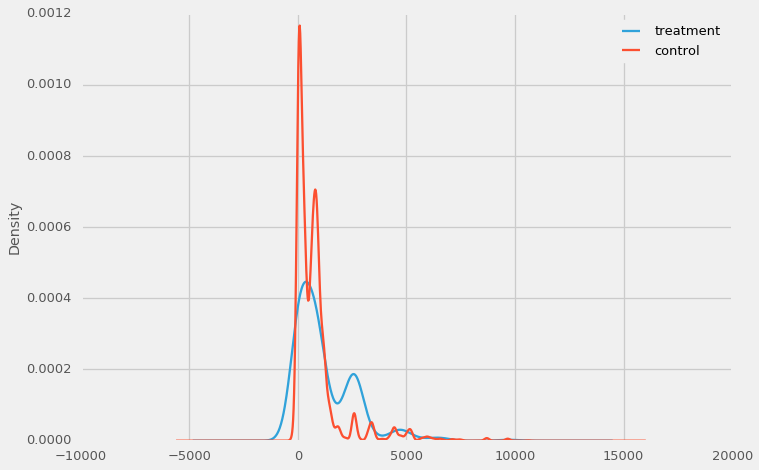

In [71]:
ax = dfalltreatment.elevation_1.plot(kind='kde',label='treatment')
dfallcontrol.elevation_1.plot(kind='kde',label='control')
plt.legend();


In [72]:
catcols = ['m_sex','marst1','srace','nhiade','grade1',
           'site1','lat1',
          'histrec1',
           'modx1','stat_rec']

In [73]:
goodcols = ['m_sex','marst1', 'srace','nhiade',
           'grade1','site1',
           'lat1','histrec1',
           'modx1','stat_rec','birthyr',
           'agedx1',
           'yrdx1','elevation_1',
           'lat_1']

In [74]:
dfpop = pd.concat([dfallcontrol, dfalltreatment])

## Before matching, let's look at the Kaplan-Meier curves

In [75]:
resgoodcontrol = pd.concat([pd.get_dummies(dfallcontrol[col],prefix=col) for col in catcols], axis=1)

resgoodtreatment = pd.concat([pd.get_dummies(dfalltreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpop = pd.concat([pd.get_dummies(dfpop[col],prefix=col) for col in catcols], axis=1)

In [76]:
print(goodcols)

['m_sex', 'marst1', 'srace', 'nhiade', 'grade1', 'site1', 'lat1', 'histrec1', 'modx1', 'stat_rec', 'birthyr', 'agedx1', 'yrdx1', 'elevation_1', 'lat_1']


In [77]:
resgoodcontrol['birthyr'] = dfallcontrol['birthyr']
resgoodcontrol['agedx1'] = dfallcontrol['agedx1']

resgoodcontrol['yrdx1'] = dfallcontrol['yrdx1']

resgoodcontrol['lat_1'] = dfallcontrol['lat_1']

resgoodcontrol['lng_1'] = dfallcontrol['lng_1']

resgoodcontrol['srvm1'] = dfallcontrol['srvm1']

In [78]:
resgoodtreatment['birthyr'] = dfalltreatment['birthyr']
resgoodtreatment['agedx1'] = dfalltreatment['agedx1']

resgoodtreatment['yrdx1'] = dfalltreatment['yrdx1']

resgoodtreatment['lat_1'] = dfalltreatment['lat_1']

resgoodtreatment['lng_1'] = dfalltreatment['lng_1']

resgoodtreatment['srvm1'] = dfalltreatment['srvm1']


In [79]:
resgoodpop['birthyr'] = dfpop['birthyr']
resgoodpop['agedx1'] = dfpop['agedx1']

resgoodpop['yrdx1'] = dfpop['yrdx1']


resgoodpop['lat_1'] = dfpop['lat_1']

resgoodpop['lng_1'] = dfpop['lng_1']

resgoodpop['srvm1'] = dfpop['srvm1']

## After performing the matching between the control and treatment groups, we can see how the Kaplan-Meier curves differ

Below is how it looks **before** matching patients in the control and treatment groups together in pairs.

In [80]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()

Tcontrol = resgoodpop.loc[smallcontrolindices]["srvm1"]
Econtrol = resgoodpop.loc[smallcontrolindices]["stat_rec_Dead"]

Ttreatment = resgoodpop.loc[smalltreatmentindices]["srvm1"]
Etreatment = resgoodpop.loc[smalltreatmentindices]["stat_rec_Dead"]

Tpop = resgoodpop["srvm1"]
Epop = resgoodpop["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Radiation group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PT group (treatment group)')

<lifelines.KaplanMeierFitter: fitted with 337 observations, 229 censored>

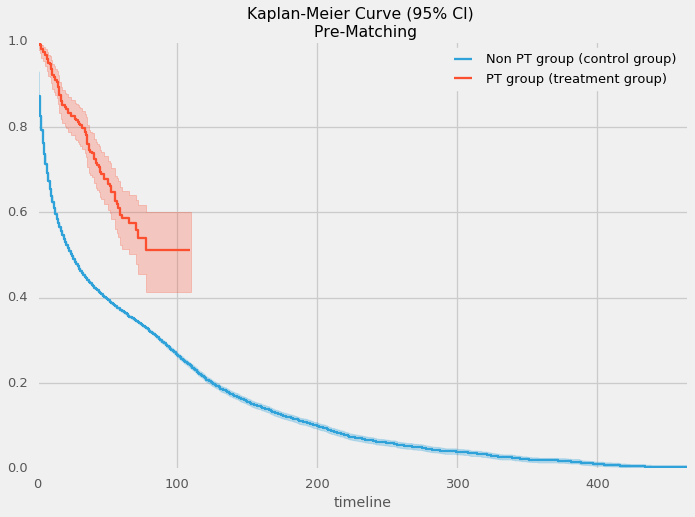

In [81]:
ax = kmfcontrol.plot()
kmftreatment.plot(ax=ax)
plt.title("Kaplan-Meier Curve (95% CI) \n Pre-Matching");

## Clearly, there is a difference between these survival curves

But one can argue that we are not really comparing apples to apples when we calculate these two survival curves. To answer this objection, we need to perform patient matching, so that we are really comparing apples to apples and that any marked difference in the survival curves can be confidently attributed to the difference in treatment modalities.

In [82]:
resgoodpop['birthyr'] = resgoodpop['birthyr'].astype('int')
resgoodpop['agedx1'] = resgoodpop['agedx1'].astype('float')



resgoodpop['lat_1'] = resgoodpop['lat_1'].astype('float')


resgoodpop['lng_1'] = resgoodpop['lng_1'].astype('float')


resgoodpop['srvm1'] = resgoodpop['srvm1'].astype('float')


newcolumns = list(resgoodpop.columns)

newcolumns.remove('srvm1')
newcolumns.remove('stat_rec_Alive')
newcolumns.remove('stat_rec_Dead')
newcolumns.remove('m_sex_Male')

resgreatpop = resgoodpop[newcolumns].copy()

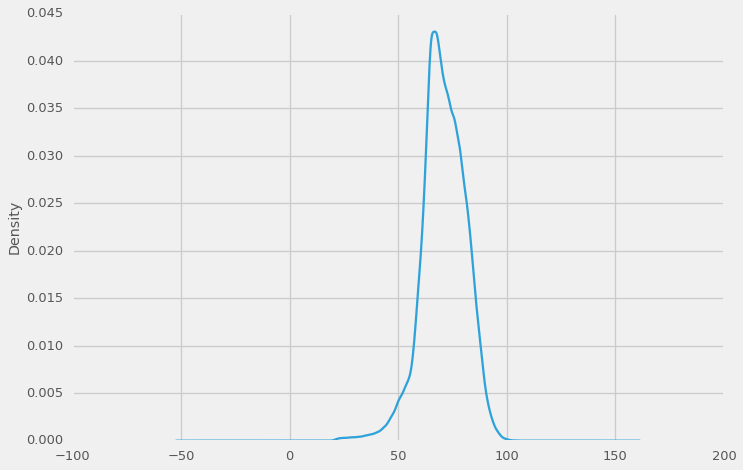

In [83]:
resgoodpop['agedx1'].plot(kind='kde')

In [84]:
resgreatpop['patient_id'] = resgreatpop.index
leaguefilter = (resgreatpop['patient_id'].loc[smalltreatmentindices])
resgreatpop['League'] = resgreatpop['patient_id'].isin(smalltreatmentindices).astype('int')
del resgreatpop['patient_id']
dftree = resgreatpop.copy()

y = dftree['League'].copy()
del dftree['League']

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plot
#import psycopg2
import random
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import StratifiedShuffleSplit
import pylab as plot
from pandas import DataFrame, Series
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_extraction
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.neural_network import MultilayerPerceptronClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
import pylab as pl
from sklearn.decomposition import RandomizedPCA
from itertools import cycle
from sklearn.cross_validation import ShuffleSplit
from scipy.stats import sem
from pprint import pprint
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import lag_plot

In [86]:
resgreatpop.columns

Index(['m_sex_Female', 'marst1_Divorced',
       'marst1_Married (including common law)', 'marst1_Separated',
       'marst1_Single (never married)', 'marst1_Unknown',
       'marst1_Unmarried or domesntic partner (same sex or opposite sex or unregistered)',
       'marst1_Widowed',
       'srace_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
       'srace_Asian Indian',
       ...
       'modx1_May', 'modx1_Nov', 'modx1_Oct', 'modx1_Sep', 'birthyr', 'agedx1',
       'yrdx1', 'lat_1', 'lng_1', 'League'],
      dtype='object', length=192)

In [87]:
dftree.columns

Index(['m_sex_Female', 'marst1_Divorced',
       'marst1_Married (including common law)', 'marst1_Separated',
       'marst1_Single (never married)', 'marst1_Unknown',
       'marst1_Unmarried or domesntic partner (same sex or opposite sex or unregistered)',
       'marst1_Widowed',
       'srace_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
       'srace_Asian Indian',
       ...
       'modx1_Mar', 'modx1_May', 'modx1_Nov', 'modx1_Oct', 'modx1_Sep',
       'birthyr', 'agedx1', 'yrdx1', 'lat_1', 'lng_1'],
      dtype='object', length=191)

In [88]:
dftree.shape

(214192, 191)

In [89]:
xTrain = dftree.values
xTrain = StandardScaler().fit_transform(xTrain)
from sklearn.neighbors import KDTree
print(xTrain)

[[-0.87165538 -0.33683083  0.91684887 ...,  0.77254462  0.8566616   1.395003  ]
 [-0.87165538 -0.33683083 -1.0906923  ...,  0.77254462  0.84178744
   1.36676179]
 [-0.87165538 -0.33683083  0.91684887 ...,  1.24148034  0.84178744
   1.36676179]
 ..., 
 [-0.87165538 -0.33683083  0.91684887 ...,  0.77254462 -0.6940198
  -0.82764073]
 [ 1.14724239 -0.33683083 -1.0906923  ..., -0.16532681 -0.48246885
  -0.77895641]
 [ 1.14724239 -0.33683083  0.91684887 ...,  0.3036089  -0.6940198
  -0.82764073]]


In [90]:
from sklearn.neighbors import KDTree
kdt = KDTree(xTrain, leaf_size=30)

## Here is a video explaining the construction of a KDTree

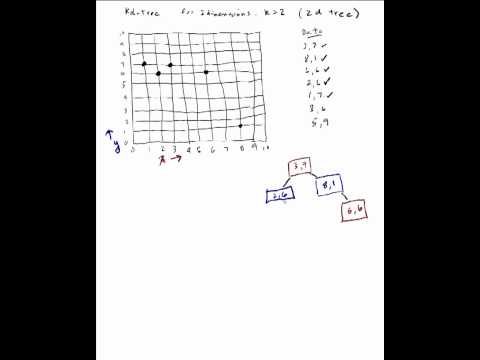

In [91]:
from IPython.display import YouTubeVideo
YouTubeVideo('LdaL-l2S76c')

In [ ]:
dftreeleague = dftree.copy()
dftreeleague['League'] = y

def get_league(x):
    return dftreeleague['League'].loc[x]

dist4, ind4 = kdt.query(xTrain, k=4, return_distance=True)